# Flight Ticket Price Prediction

Problem Definition:
Predict the price of airline tickets for various routes and classes based on historical data and relevant features. The goal is to build a machine learning model that can accurately estimate ticket prices, helping travelers make informed decisions when booking flights.

Key Components:

Target Variable: The target variable is the "price" of the flight ticket, which represents the cost of a ticket for a specific route and class.

Features: You'll need various features (independent variables) to make price predictions. These features can include:

Route: The departure and arrival cities (e.g., Bangalore to Mumbai).

Airline: The airline carrier (e.g., Vistara).

Class: The travel class (economy, business, first class, etc.).

Departure Time: The time of day (morning, afternoon, evening, night).

Month: The month of travel.

Stopovers: The number of stopovers during the flight.

Arrival Time: The time of arrival at the destination.

Day: The day of the week (e.g., Monday, Tuesday).

Duration : Duration of journey from deparature city to arrival city

Problem Type: This is a regression problem to predict  the price of the flight ticket which are continuous numerical value.

Objectives:

To Develop a machine learning model that accurately predicts flight ticket prices for different routes, airlines, classes, and other relevant factors.
Provide travelers with a tool that helps them estimate ticket prices, enabling them to plan and make cost-effective travel choices.
Success Criteria:
The success of the project can be measured based on the model's ability to predict flight ticket prices accurately. Goal is to Achieve Best Accuracy by evaluating the model's performance using appropriate regression metrics (e.g., mean absolute error, mean squared error, or R-squared) and ensuring that the predictions closely align with actual ticket prices.



## Data Preprocessing

In [1]:
import numpy as np # Importing Depencdencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Scraped_dataset.csv")
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [3]:
print('Scraped_dataset.csv',df.shape)

Scraped_dataset.csv (452088, 8)


In [4]:
df['Airline-Class'] = df['Airline-Class'].replace(regex=r'\n.*?\n', value=',')

df[['Airline', 'Class']] = df['Airline-Class'].str.split(",",1, expand=True)

In [5]:
df[['Departure_Time','Deparature_City']] = df["Departure Time"].str.split("\n",1,expand=True)

df[['Arrival_Time','Arrival_City']] = df["Arrival Time"].str.split("\n",1,expand=True)

df.drop(columns={"Airline-Class","Departure Time","Arrival Time"},inplace=True)

In [6]:
def format_duration(duration_str):
    hours, minutes = map(int, duration_str.replace('h', '').replace('m', '').split())
    formatted_duration = "{:02d}:{:02d}".format(hours, minutes)
    return formatted_duration

df["Duration"] = df["Duration"].apply(format_duration)

In [7]:
df["Total Stops"] = df["Total Stops"].str.split("\n").str[0]

df["Price"] = pd.to_numeric(df["Price"].str.replace(',', ''), errors='coerce')

In [8]:
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"]).dt.time
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"]).dt.time

In [9]:
df['Date of Booking'] = pd.to_datetime(df['Date of Booking'], format='%d/%m/%Y')
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], format='%d/%m/%Y')
df['days_difference'] = (df['Date of Journey'] - df['Date of Booking']).dt.days

In [10]:
df['days_difference'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [11]:
df["Journey_month"] = df["Date of Journey"].dt.month_name()

In [12]:
df["journey_day"] = df["Date of Journey"].dt.day_name()

In [13]:
df["journey_date"] = df["Date of Journey"].dt.day.astype(int)

In [14]:
import datetime
def get_time_category(time):
    
    early_morning_start = datetime.time(0, 0)
    early_morning_end = datetime.time(5, 59)
    morning_start = datetime.time(6, 0)
    morning_end = datetime.time(11, 59)
    afternoon_start = datetime.time(12, 0)
    afternoon_end = datetime.time(17, 59)
    evening_start = datetime.time(18, 0)
    evening_end = datetime.time(20, 59)
    late_night_start = datetime.time(21, 0)
    late_night_end = datetime.time(23, 59)
    
    # Check the time category
    if early_morning_start <= time <= early_morning_end:
        return 'Early_Morning'
    elif morning_start <= time <= morning_end:
        return 'Morning'
    elif afternoon_start <= time <= afternoon_end:
        return 'Afternoon'
    elif evening_start <= time <= evening_end:
        return 'Evening'
    elif late_night_start <= time <= late_night_end:
        return 'Late_Night'
    else:
        return 'Night'

df["Arrival_Time"] = df["Arrival_Time"].apply(get_time_category)
df["Departure_Time"] = df["Departure_Time"].apply(get_time_category)

df["Duration"] = df["Duration"].str.replace(":",".").str[1:]

df["Duration"]= df["Duration"].astype(float)

df["Route"] = df["Deparature_City"] +"-"+df["Arrival_City"]

df["Isdirect_flight"] = (df['Total Stops'] == "non-stop").astype(int)

df.drop(columns=["Date of Booking","Date of Journey"],inplace=True)

df["Airline"] = df["Airline"].str.strip()

df["days_difference"] = df["days_difference"].astype(float)

df["Price"] = df["Price"].astype(float)

In [15]:
df = df.iloc[:,[3,4,6,8,5,7,0,1,9,10,12,11,13,14,2]]

In [16]:
df

,Airline,Class,Deparature_City,Arrival_City,Departure_Time,Arrival_Time,Duration,Total Stops,days_difference,Journey_month,journey_date,journey_day,Route,Isdirect_flight,Price
0,SpiceJet,ECONOMY,Delhi,Mumbai,Evening,Late_Night,2.05,non-stop,1.0,January,16,Monday,Delhi-Mumbai,1,5335.0
1,Indigo,ECONOMY,Delhi,Mumbai,Late_Night,Early_Morning,2.20,non-stop,1.0,January,16,Monday,Delhi-Mumbai,1,5899.0
2,GO FIRST,ECONOMY,Delhi,Mumbai,Late_Night,Early_Morning,2.10,non-stop,1.0,January,16,Monday,Delhi-Mumbai,1,5801.0
3,SpiceJet,ECONOMY,Delhi,Mumbai,Evening,Evening,2.05,non-stop,1.0,January,16,Monday,Delhi-Mumbai,1,5794.0
4,Air India,ECONOMY,Delhi,Mumbai,Evening,Late_Night,2.10,non-stop,1.0,January,16,Monday,Delhi-Mumbai,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,Vistara,BUSINESS,Ahmedabad,Chennai,Morning,Evening,3.05,1-stop,50.0,March,6,Monday,Ahmedabad-Chennai,0,65028.0
452084,Vistara,BUSINESS,Ahmedabad,Chennai,Early_Morning,Afternoon,1.15,1-stop,50.0,March,6,Monday,Ahmedabad-Chennai,0,69254.0
452085,Vistara,BUSINESS,Ahmedabad,Chennai,Early_Morning,Afternoon,1.15,1-stop,50.0,March,6,Monday,Ahmedabad-Chennai,0,69254.0
452086,Vistara,BUSINESS,Ahmedabad,Chennai,Morning,Evening,1.10,1-stop,50.0,March,6,Monday,Ahmedabad-Chennai,0,72980.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.utils import shuffle

df= shuffle(df, random_state=42) 
df.reset_index(drop=True, inplace=True)

In [17]:
# Removing Outliers for Better performance of model 
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df.reset_index(inplace = True, drop=True)

In [2]:
df = pd.read_csv("flight_cleaned.csv")
df

,Airline,Class,Deparature_City,Arrival_City,Departure_Time,Arrival_Time,Duration,Total Stops,Remaining Days,Journey_month,journey_date,journey_day,Route,Isdirect_flight,Price
0,Indigo,ECONOMY,Bangalore,Kolkata,Morning,Morning,5.40,1-stop,35.0,February,19,Sunday,Bangalore-Kolkata,0,7180.0
1,Air India,ECONOMY,Bangalore,Hyderabad,Late_Night,Afternoon,5.00,1-stop,3.0,January,18,Wednesday,Bangalore-Hyderabad,0,12430.0
2,Vistara,BUSINESS,Delhi,Hyderabad,Afternoon,Morning,7.25,1-stop,35.0,February,19,Sunday,Delhi-Hyderabad,0,47329.0
3,Air India,ECONOMY,Chennai,Delhi,Morning,Evening,6.50,1-stop,12.0,January,27,Friday,Chennai-Delhi,0,6873.0
4,Vistara,PREMIUMECONOMY,Bangalore,Hyderabad,Morning,Afternoon,7.15,1-stop,19.0,February,3,Friday,Bangalore-Hyderabad,0,21817.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442838,Vistara,ECONOMY,Hyderabad,Mumbai,Morning,Late_Night,1.50,1-stop,19.0,February,3,Friday,Hyderabad-Mumbai,0,11933.0
442839,Vistara,BUSINESS,Chennai,Mumbai,Morning,Afternoon,0.30,1-stop,11.0,January,26,Thursday,Chennai-Mumbai,0,69089.0
442840,Vistara,PREMIUMECONOMY,Mumbai,Kolkata,Late_Night,Morning,0.25,1-stop,12.0,January,27,Friday,Mumbai-Kolkata,0,17458.0
442841,Vistara,PREMIUMECONOMY,Mumbai,Chennai,Morning,Evening,0.00,1-stop,260.0,October,2,Monday,Mumbai-Chennai,0,16394.0


In [3]:
for i in df.columns:
    if df[i].dtype == "O":
        print(f'\n{i} : {df[i].nunique()} \n{df[i].unique()}')


Airline : 9 
['Indigo' 'Air India' 'Vistara' 'GO FIRST' 'AirAsia' 'AkasaAir' 'SpiceJet'
 'AllianceAir' 'StarAir']

Class : 4 
['ECONOMY' 'BUSINESS' 'PREMIUMECONOMY' 'FIRST']

Deparature_City : 7 
['Bangalore' 'Delhi' 'Chennai' 'Ahmedabad' 'Kolkata' 'Hyderabad' 'Mumbai']

Arrival_City : 7 
['Kolkata' 'Hyderabad' 'Delhi' 'Bangalore' 'Chennai' 'Mumbai' 'Ahmedabad']

Departure_Time : 5 
['Morning' 'Late_Night' 'Afternoon' 'Evening' 'Early_Morning']

Arrival_Time : 5 
['Morning' 'Afternoon' 'Evening' 'Late_Night' 'Early_Morning']

Total Stops : 3 
['1-stop' 'non-stop' '2+-stop']

Journey_month : 12 
['February' 'January' 'September' 'April' 'October' 'May' 'December'
 'August' 'March' 'June' 'July' 'November']

journey_day : 7 
['Sunday' 'Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Thursday']

Route : 42 
['Bangalore-Kolkata' 'Bangalore-Hyderabad' 'Delhi-Hyderabad'
 'Chennai-Delhi' 'Ahmedabad-Kolkata' 'Kolkata-Bangalore' 'Delhi-Kolkata'
 'Hyderabad-Delhi' 'Delhi-Chennai' 'Ahmedabad-

In [ ]:
airline_dict = {"AkasaAir":0,"AllianceAir":1,"AirAsia":2,"GO FIRST":3,"SpiceJet":4,"Indigo":5,"StarAir":6,"Vistara":7,
                "Air India":8}
class_dict = {"ECONOMY":0,"PREMIUMECONOMY":1,"BUSINESS":2,"FIRST":3}
journey_day_dict = {"Tuesday":0,"Saturday":1,"Friday":2,"Thursday":3,"Monday":4,"Wednesday":5,"Sunday":6}
journey_month_dict = {"September":0,"December":1,"February":2,"March":3,"June":4,"July":5,"October":6,"May":7,"April":8,"August":9,"November":10,"January":11}
stop_dict = {'1-stop':2,'2+-stop':1,"non-stop":0}
arr_time_dict = {"Early_Morning":0,"Morning":1,"Afternoon":2,"Late_Night":3,"Evening":4}
dep_time_dict = {"Early_Morning":0,"Afternoon":1,"Late_Night":2,"Morning":3,"Evening":4}
arr_city_dict = {"Delhi":0,"Ahmedabad":1,"Hyderabad":2,"Bangalore":3,"Mumbai":4,"Chennai":5,"Kolkata":6}
dep_city_dict = {"Delhi":0,"Hyderabad":1,"Ahmedabad":2,"Bangalore":3,"Chennai":4,"Mumbai":5,"Kolkata":6}

rout_dict = {'Ahmedabad-Mumbai': 41, 'Kolkata-Mumbai': 40, 'Mumbai-Kolkata': 39, 'Mumbai-Chennai': 38, 'Kolkata-Chennai': 37, 'Bangalore-Kolkata': 36, 'Mumbai-Bangalore': 35, 'Bangalore-Mumbai': 34, 'Chennai-Kolkata': 33, 'Kolkata-Ahmedabad': 32, 'Delhi-Kolkata': 31, 'Bangalore-Chennai': 30, 'Kolkata-Bangalore': 29, 'Ahmedabad-Chennai': 28, 'Chennai-Mumbai': 27, 'Kolkata-Delhi': 26, 'Hyderabad-Kolkata': 25, 'Ahmedabad-Kolkata': 24, 'Kolkata-Hyderabad': 23, 'Mumbai-Hyderabad': 22, 'Chennai-Delhi': 21, 'Mumbai-Ahmedabad': 20, 'Chennai-Bangalore': 19, 'Hyderabad-Bangalore': 18, 'Bangalore-Hyderabad': 17, 'Hyderabad-Chennai': 16, 'Delhi-Chennai': 15, 'Chennai-Ahmedabad': 14, 'Hyderabad-Mumbai': 13, 'Chennai-Hyderabad': 12, 'Hyderabad-Delhi': 11, 'Bangalore-Ahmedabad': 10, 'Ahmedabad-Bangalore': 9, 'Ahmedabad-Hyderabad': 8, 'Delhi-Mumbai': 7, 'Ahmedabad-Delhi': 6, 'Mumbai-Delhi': 5, 'Delhi-Hyderabad': 4, 'Delhi-Bangalore': 3, 'Bangalore-Delhi': 2, 'Delhi-Ahmedabad': 1, 'Hyderabad-Ahmedabad': 0}

In [21]:
df['Airline']         = df['Airline'].replace(airline_dict)
df['Class']           = df['Class'].replace(class_dict)
df['Deparature_City'] = df['Deparature_City'].replace(dep_city_dict)
df['Arrival_City']    = df['Arrival_City'].replace(arr_city_dict)
df['Departure_Time']  = df['Departure_Time'].replace(dep_time_dict)
df['Arrival_Time']    = df['Arrival_Time'].replace(arr_time_dict)
df['Route']           = df['Route'].replace(rout_dict)
df['Total Stops']     = df['Total Stops'].replace(stop_dict)
df['Journey_month']   = df['Journey_month'].replace(journey_month_dict)
df['journey_day']     = df['journey_day'].replace(journey_day_dict)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442843 entries, 0 to 442842
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Airline          442843 non-null  object 
 1   Class            442843 non-null  object 
 2   Deparature_City  442843 non-null  object 
 3   Arrival_City     442843 non-null  object 
 4   Departure_Time   442843 non-null  object 
 5   Arrival_Time     442843 non-null  object 
 6   Duration         442843 non-null  float64
 7   Total Stops      442843 non-null  object 
 8   Remaining Days   442843 non-null  float64
 9   Journey_month    442843 non-null  object 
 10  journey_date     442843 non-null  int64  
 11  journey_day      442843 non-null  object 
 12  Route            442843 non-null  object 
 13  Isdirect_flight  442843 non-null  int64  
 14  Price            442843 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 50.7+ MB


## Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.columns

Index(['Airline', 'Class', 'Deparature_City', 'Arrival_City', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Total Stops', 'Remaining Days',
       'Journey_month', 'journey_date', 'journey_day', 'Route',
       'Isdirect_flight', 'Price'],
      dtype='object')

Text(0.5, 1.0, 'Day of Week')

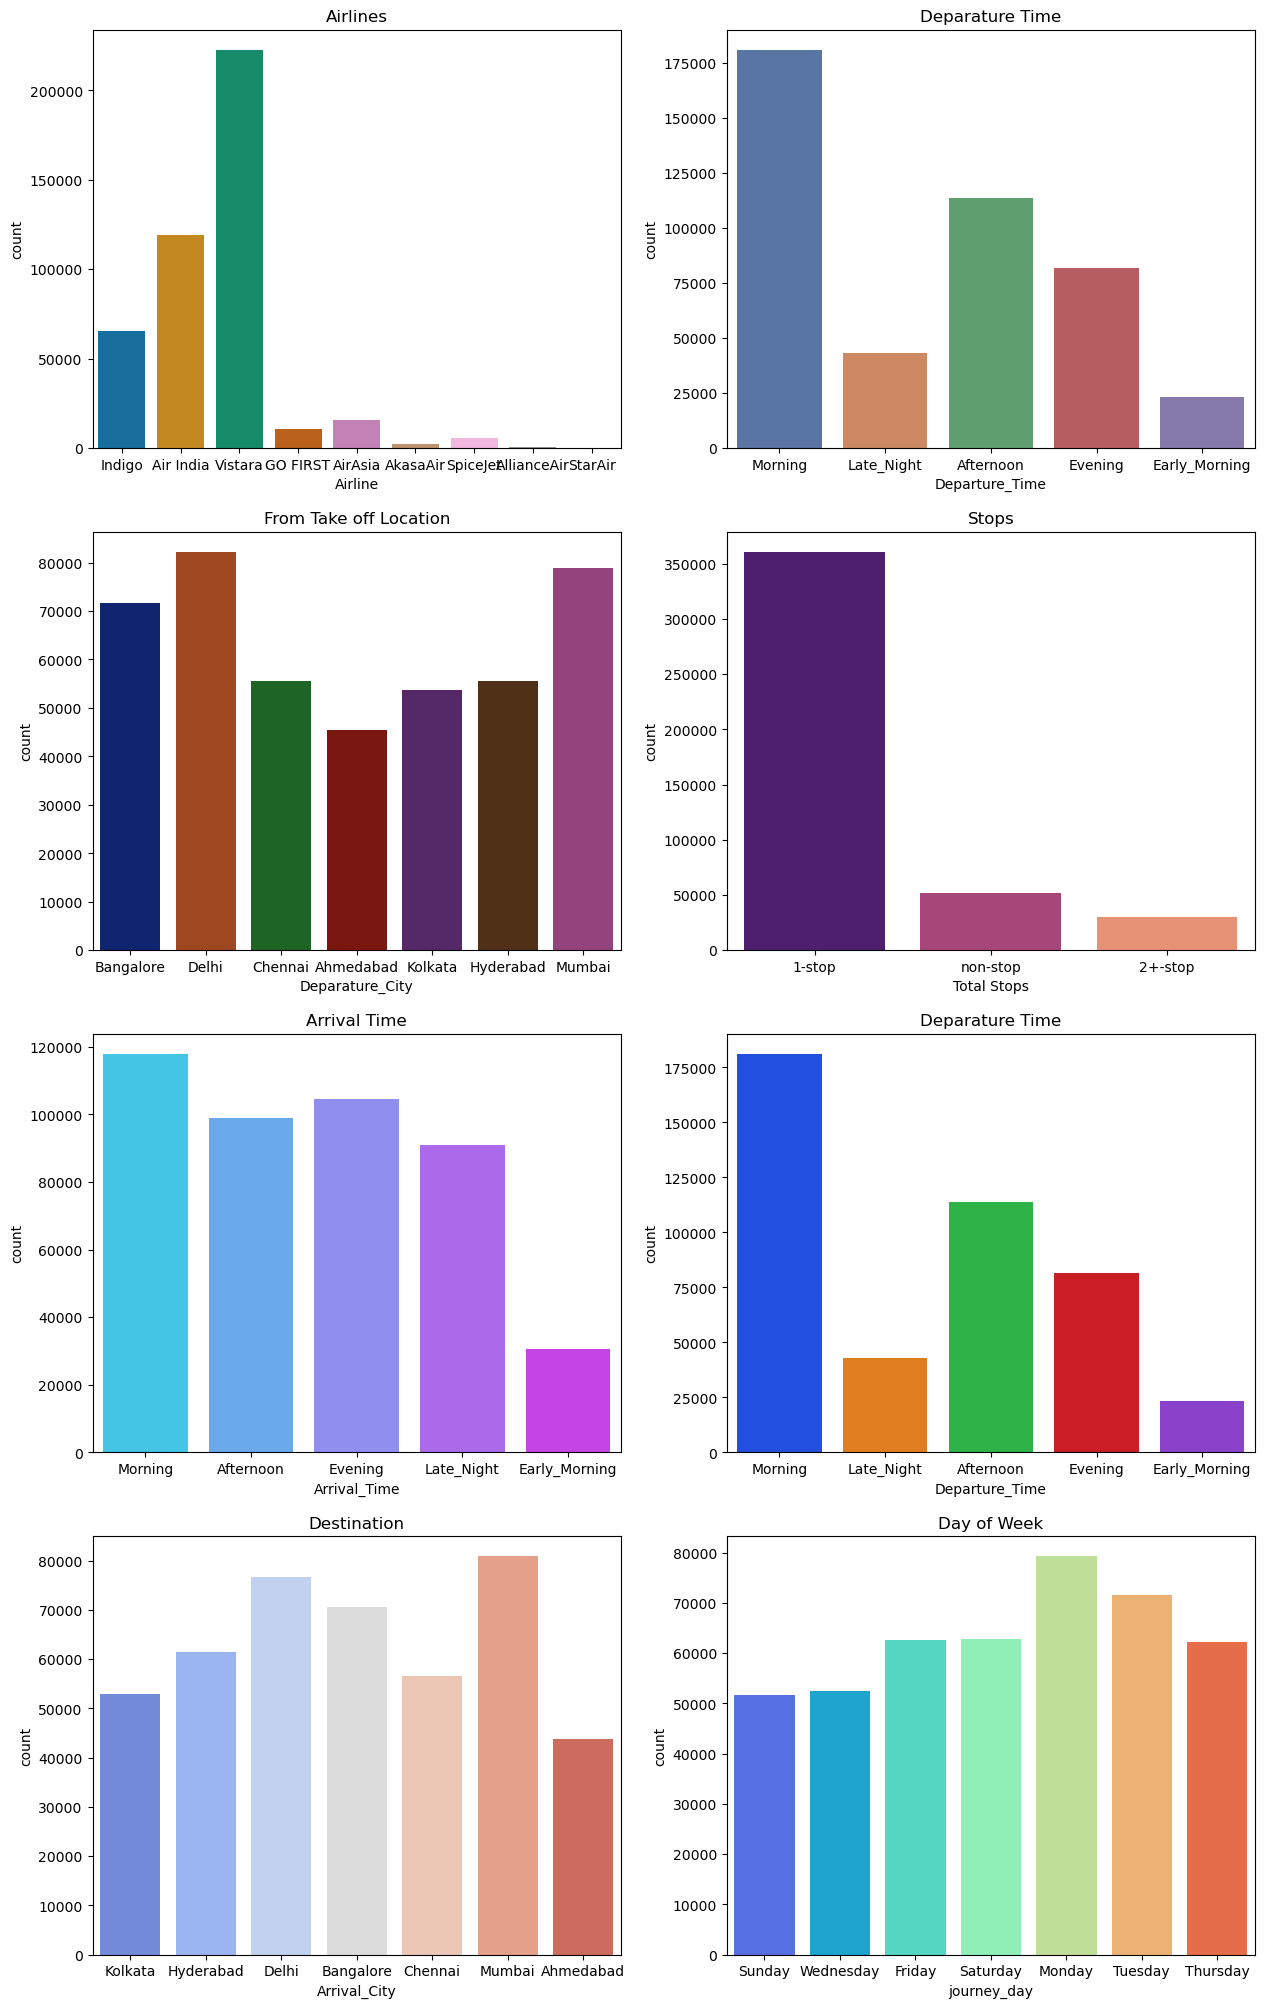

In [7]:
fig, axes = plt.subplots(4,2,figsize = (15,25))

sns.countplot(data=df,x="Airline",ax=axes[0, 0],palette='colorblind')
axes[0, 0].set_title('Airlines')

sns.countplot(data=df,x="Departure_Time",ax=axes[0, 1],palette="deep")
axes[0, 1].set_title('Deparature Time')

sns.countplot(data=df,x="Deparature_City",ax=axes[1, 0],palette="dark")
axes[1, 0].set_title('From Take off Location')

sns.countplot(data=df,x="Total Stops",ax=axes[1, 1],palette="magma")
axes[1, 1].set_title('Stops')

sns.countplot(data=df,x="Arrival_Time",ax=axes[2, 0],palette="cool")
axes[2, 0].set_title('Arrival Time')

sns.countplot(data=df,x="Departure_Time",ax=axes[2, 1],palette="bright")
axes[2, 1].set_title('Deparature Time')


sns.countplot(data=df,x="Arrival_City",ax=axes[3, 0],palette="coolwarm")
axes[3, 0].set_title('Destination')


sns.countplot(data=df,x="journey_day",ax=axes[3, 1],palette="rainbow")
axes[3, 1].set_title('Day of Week')





<AxesSubplot:xlabel='count', ylabel='route'>

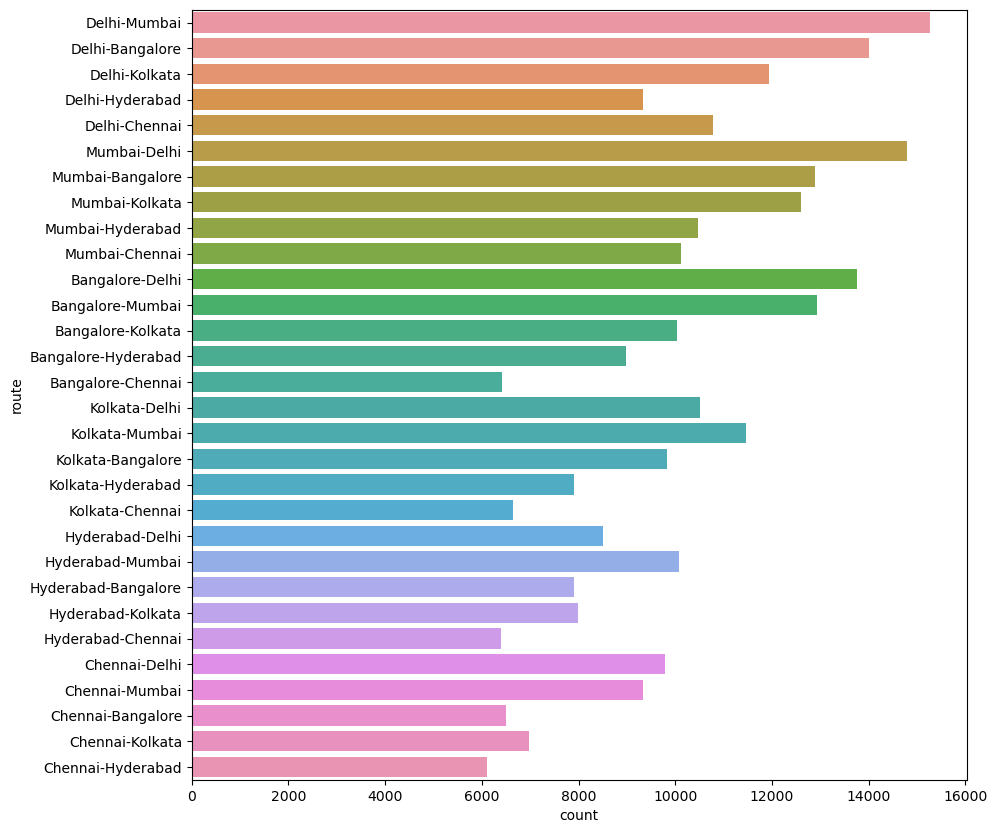

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,y="route")

Most of The Data points have Price Values Between 10000 to 20000 from below histplot

<AxesSubplot:xlabel='Price', ylabel='Count'>

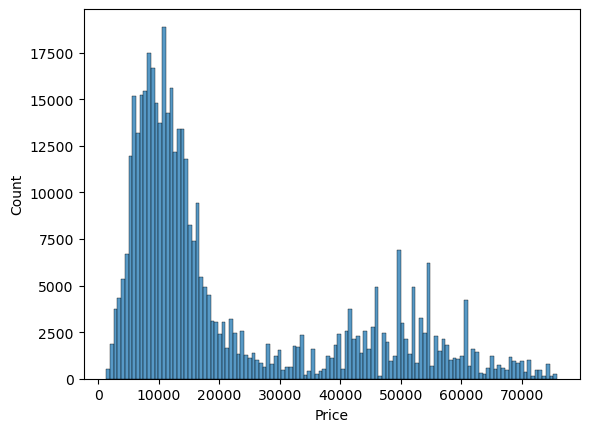

In [8]:
sns.histplot(data=df,x='Price')

<AxesSubplot:ylabel='Route'>

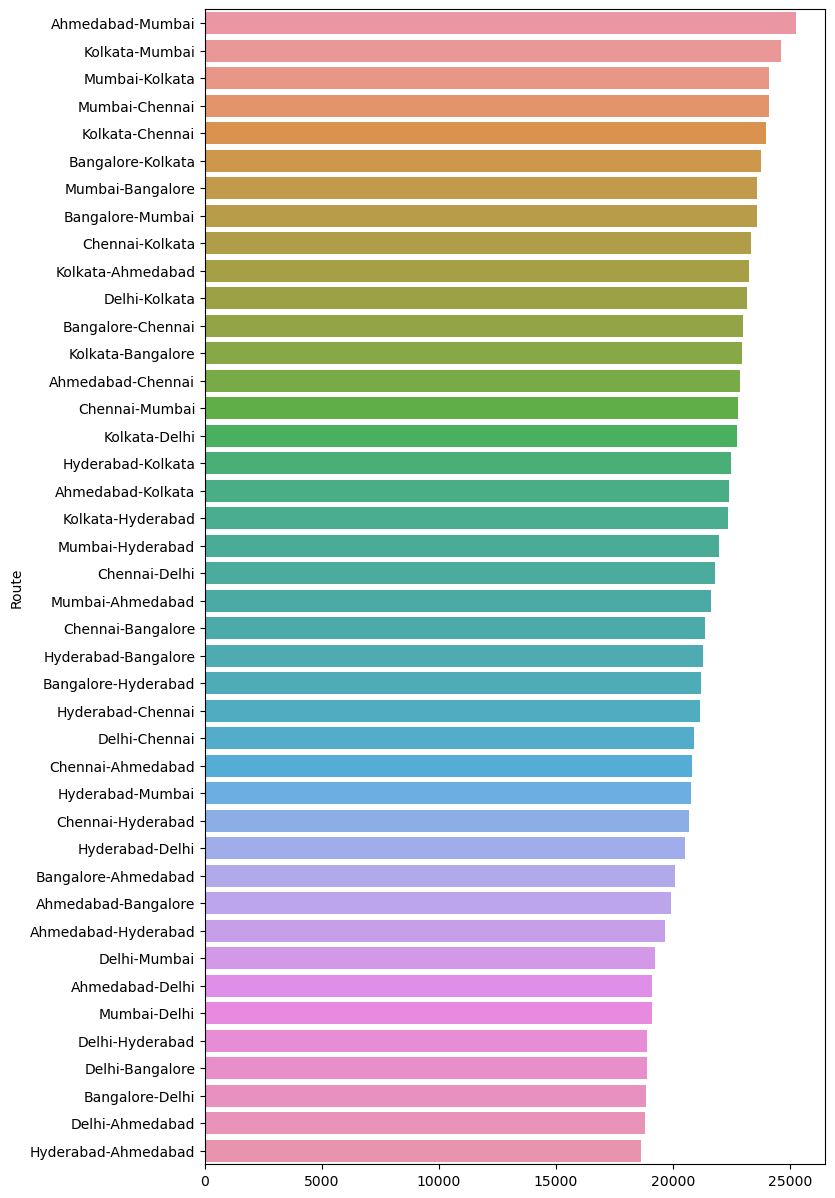

In [9]:
route_wise_price = df.groupby('Route').mean()['Price'].sort_values(ascending=False)

plt.figure(figsize=(8,15))
sns.barplot(x=route_wise_price.values,y=route_wise_price.index)
# There is Some Difference in Mean prices Between routes 

<AxesSubplot:ylabel='Route'>

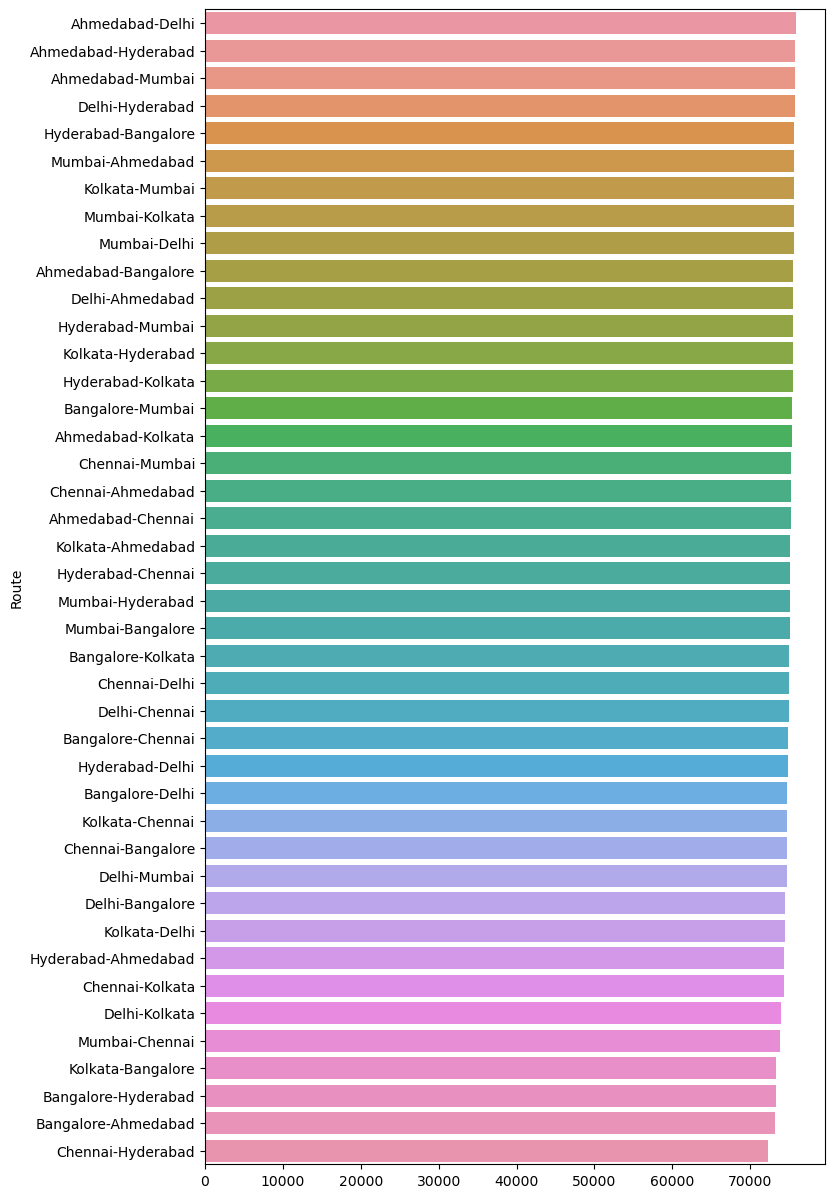

In [10]:
route_wise_price = df.groupby('Route').max()['Price'].sort_values(ascending=False)

plt.figure(figsize=(8,15))
sns.barplot(x=route_wise_price.values,y=route_wise_price.index)
# There is No difference Between Maximum Prices

<AxesSubplot:ylabel='Airline'>

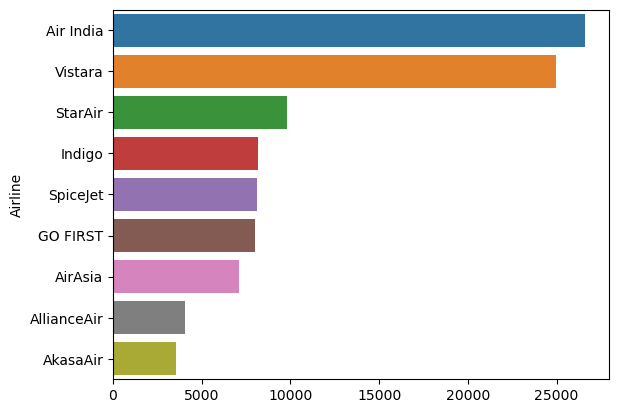

In [11]:
airline_wise_price = df.groupby("Airline").mean()["Price"].sort_values(ascending=False)

sns.barplot(x=airline_wise_price.values,y=airline_wise_price.index)

<AxesSubplot:ylabel='Airline'>

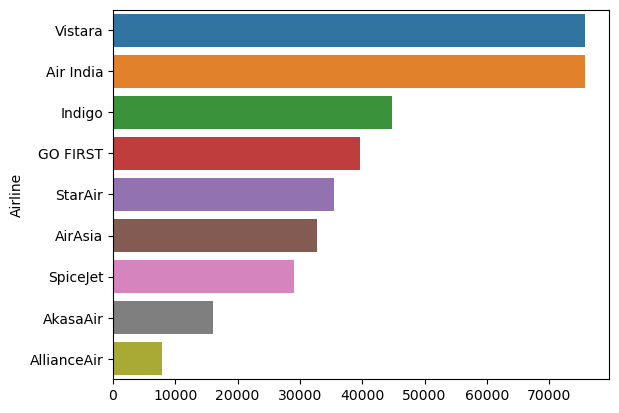

In [12]:
airline_wise_price = df.groupby("Airline").max()["Price"].sort_values(ascending=False)

sns.barplot(x=airline_wise_price.values,y=airline_wise_price.index)

vistara and Air India Companies Offers Maximum Ticket Prices

<AxesSubplot:ylabel='Deparature_City'>

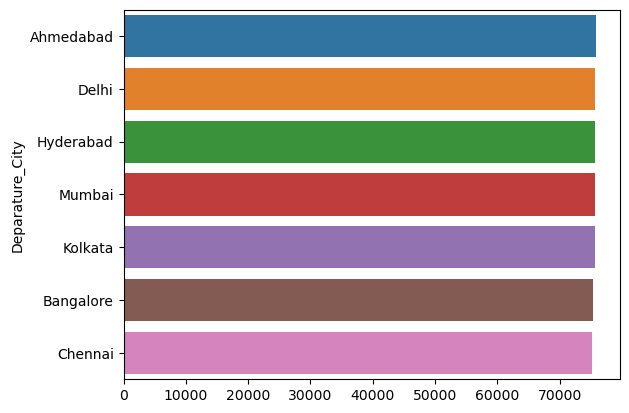

In [13]:
Deparature_City_wise_price = df.groupby("Deparature_City").max()["Price"].sort_values(ascending=False)

sns.barplot(x=Deparature_City_wise_price.values,y=Deparature_City_wise_price.index)

<AxesSubplot:ylabel='Arrival_City'>

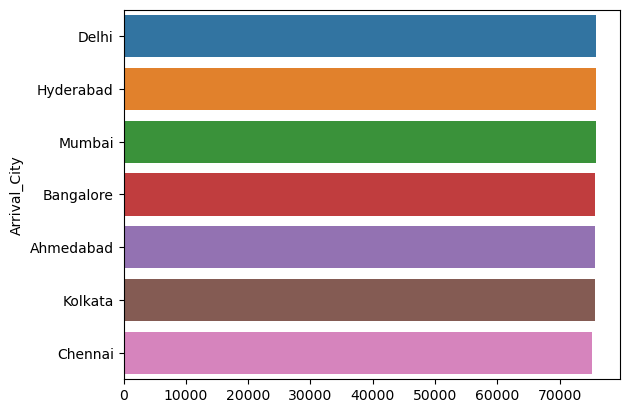

In [14]:
Arrival_City_wise_price = df.groupby("Arrival_City").max()["Price"].sort_values(ascending=False)

sns.barplot(x=Arrival_City_wise_price.values,y=Arrival_City_wise_price.index)

<AxesSubplot:ylabel='Deparature_City'>

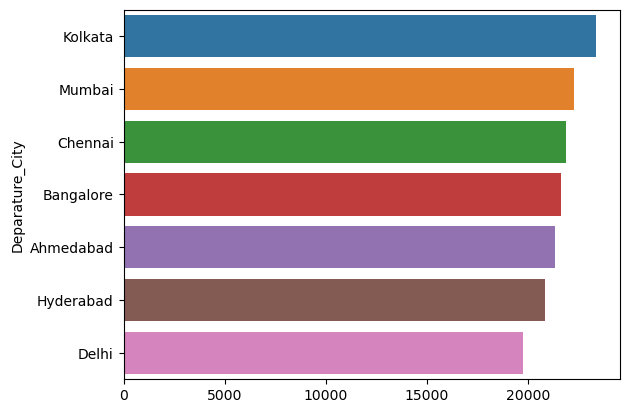

In [15]:
Deparature_City_wise_price = df.groupby("Deparature_City").mean()["Price"].sort_values(ascending=False)

sns.barplot(x=Deparature_City_wise_price.values,y=Deparature_City_wise_price.index)

<AxesSubplot:ylabel='Arrival_City'>

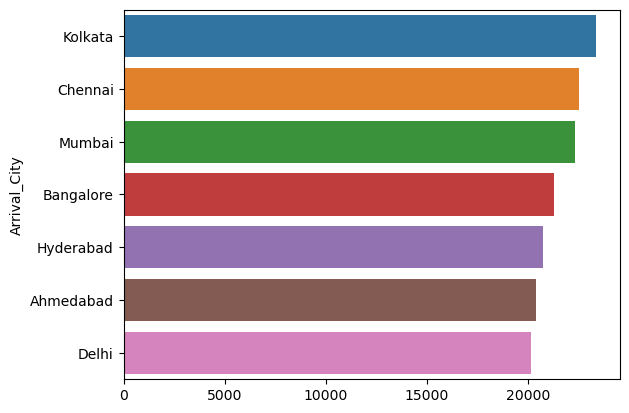

In [16]:
Arrival_City = df.groupby("Arrival_City").mean()["Price"].sort_values(ascending=False)

sns.barplot(x=Arrival_City.values,y=Arrival_City.index)

There is No difference Between Maximum Prices But small difference between Mean Prices

<AxesSubplot:xlabel='Remaining Days'>

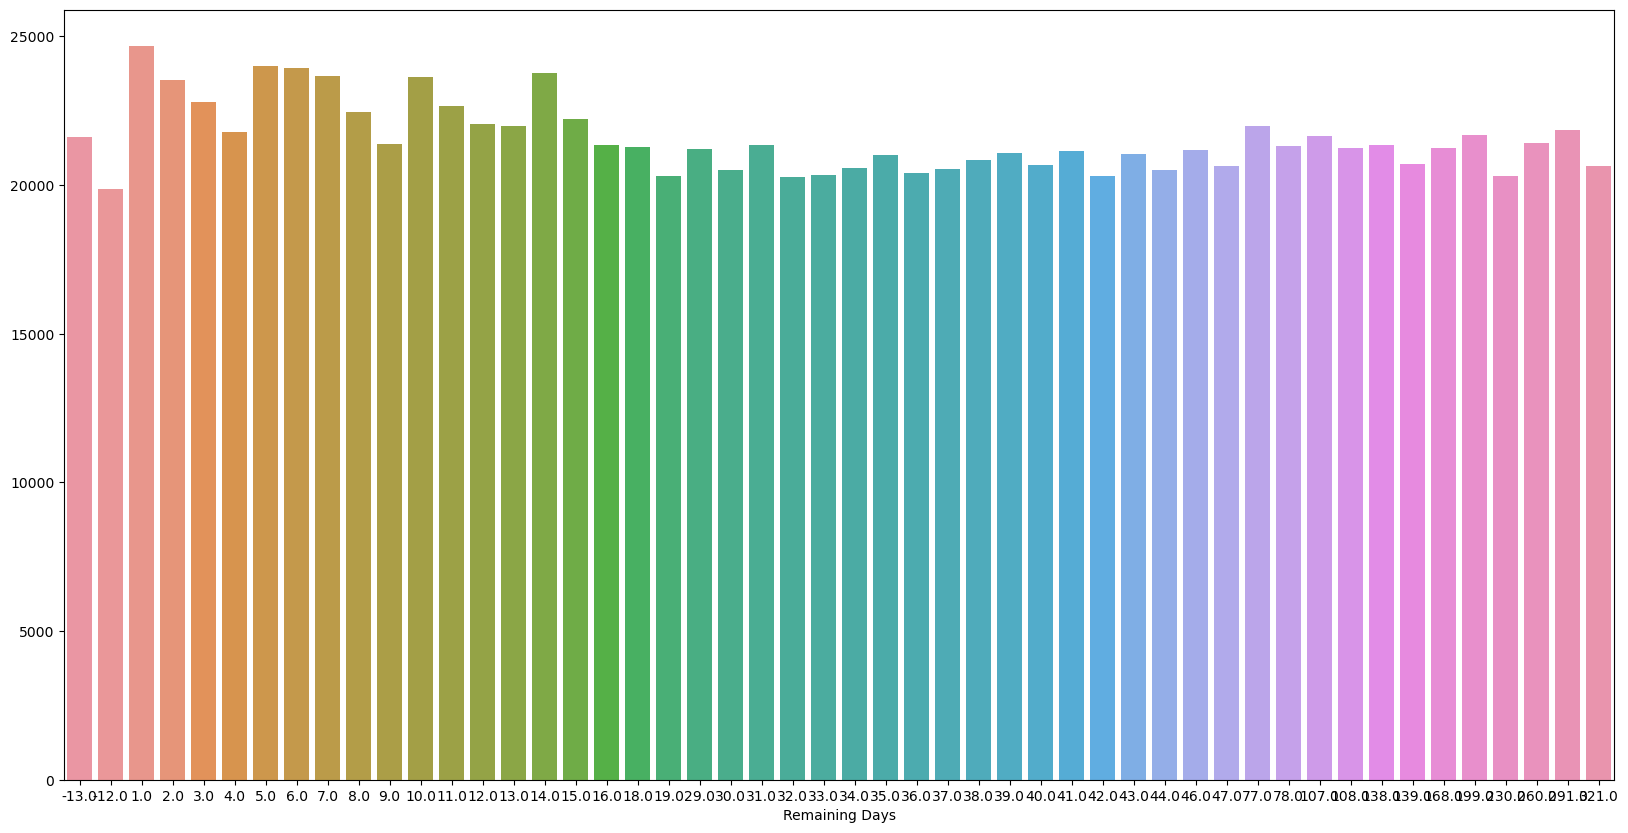

In [17]:
remaining_day_wise_price = df.groupby("Remaining Days").mean()["Price"].sort_values(ascending=True)
plt.figure(figsize=(20,10))
sns.barplot(x=remaining_day_wise_price.index,y=remaining_day_wise_price.values)

<AxesSubplot:xlabel='Total Stops'>

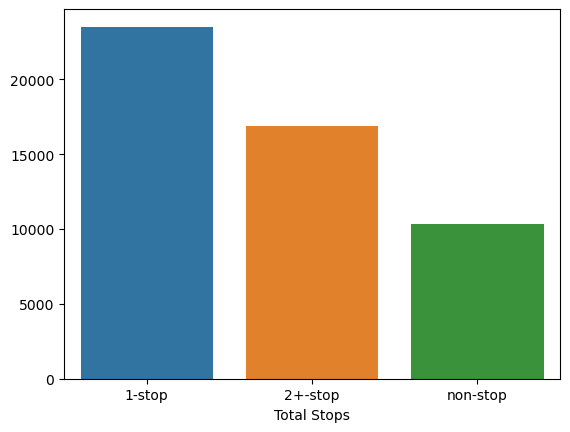

In [18]:
stop_wise_price = df.groupby("Total Stops").mean()["Price"].sort_values(ascending=False)

sns.barplot(x=stop_wise_price.index,y=stop_wise_price.values)

In [19]:
df.columns

Index(['Airline', 'Class', 'Deparature_City', 'Arrival_City', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Total Stops', 'Remaining Days',
       'Journey_month', 'journey_date', 'journey_day', 'Route',
       'Isdirect_flight', 'Price'],
      dtype='object')

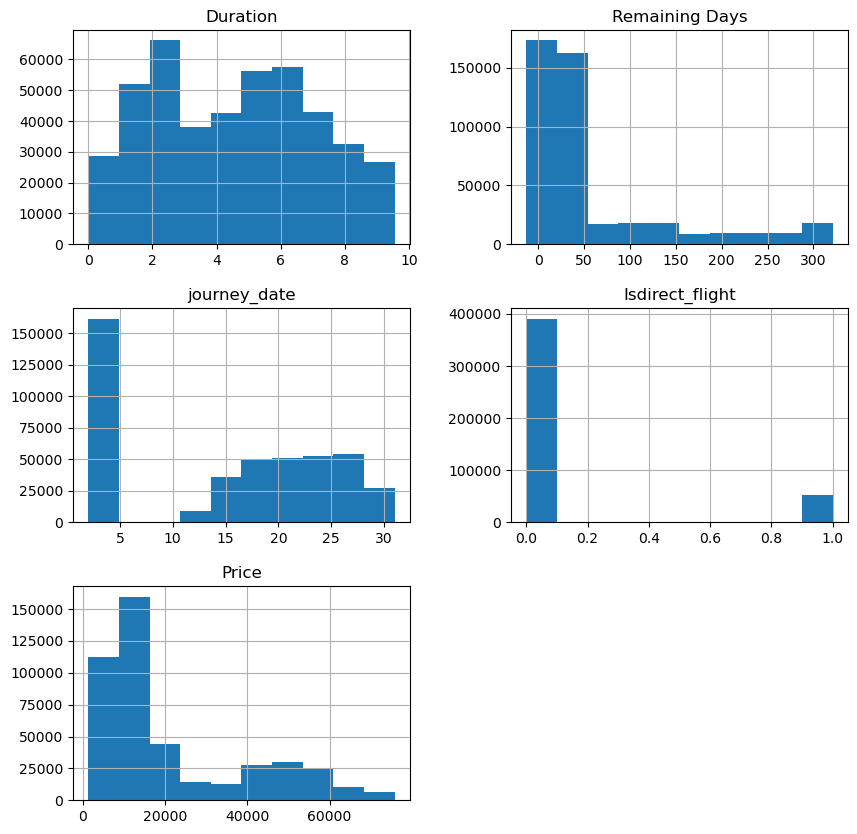

In [20]:
df.hist(figsize=(10,10))
plt.show()

In [21]:
df.describe()

,Duration,Remaining Days,journey_date,Isdirect_flight,Price
count,442843.000000,442843.000000,442843.000000,442843.000000,442843.000000
mean,4.542537,59.666227,14.838317,0.116870,21528.001084
std,2.632163,78.548435,10.266209,0.321266,18308.625118
min,0.000000,-13.000000,2.000000,0.000000,1307.000000
25%,2.200000,12.000000,3.000000,0.000000,8684.000000
50%,4.500000,34.000000,17.000000,0.000000,13178.000000
75%,6.450000,47.000000,24.000000,0.000000,32326.000000
max,9.550000,321.000000,31.000000,1.000000,75823.000000


# Correlations Of Features With Target Variables

<AxesSubplot:>

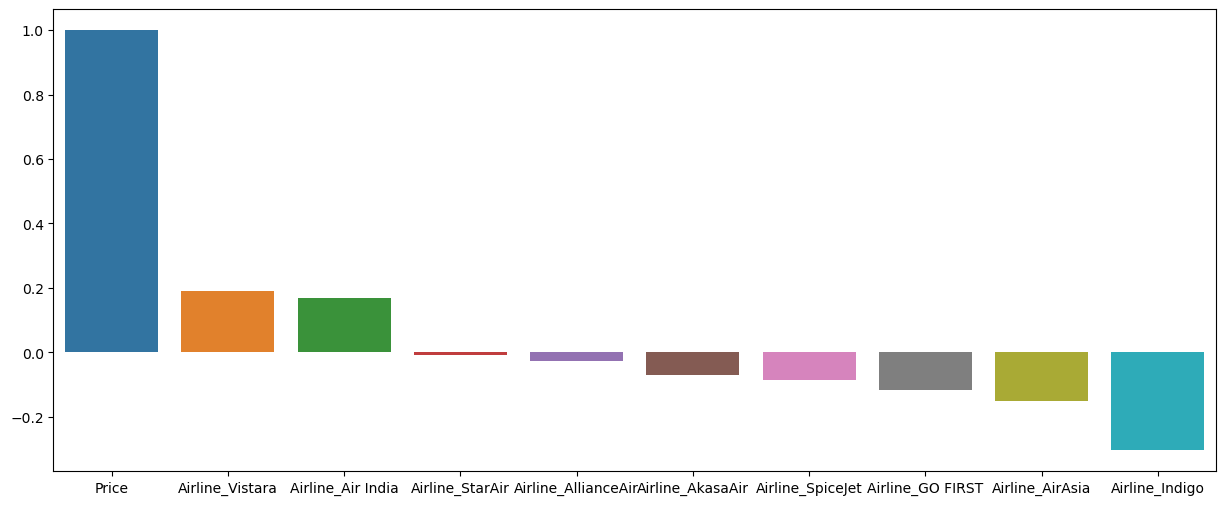

In [27]:
feature_corrlation = pd.get_dummies(df[['Airline','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

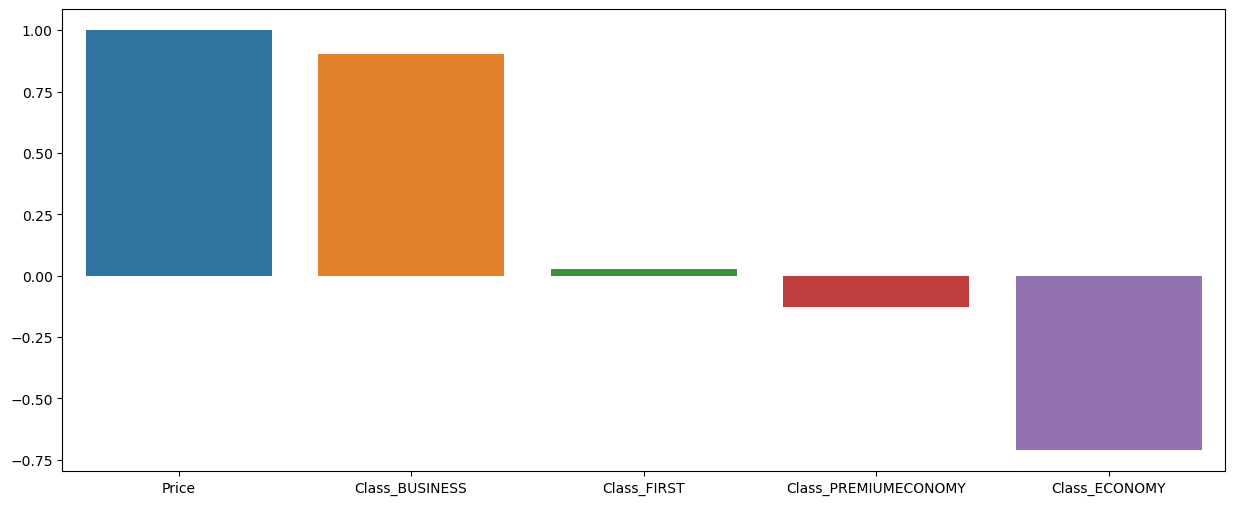

In [28]:
feature_corrlation = pd.get_dummies(df[['Class','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

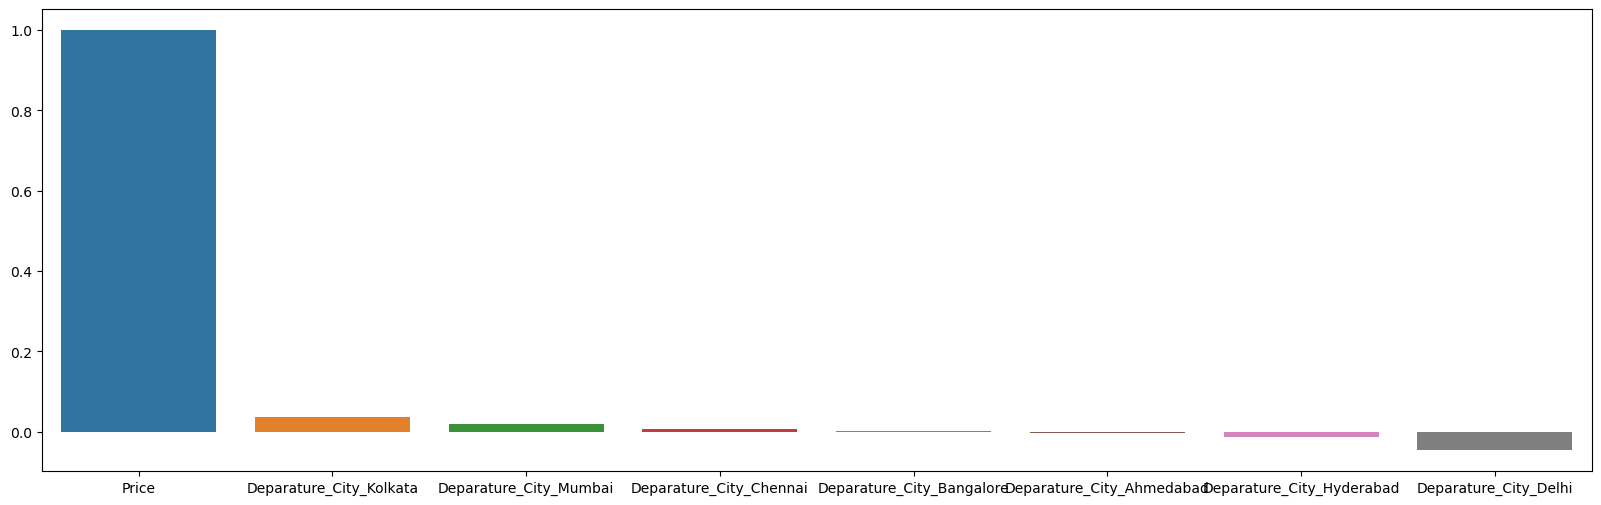

In [30]:
feature_corrlation = pd.get_dummies(df[['Deparature_City','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

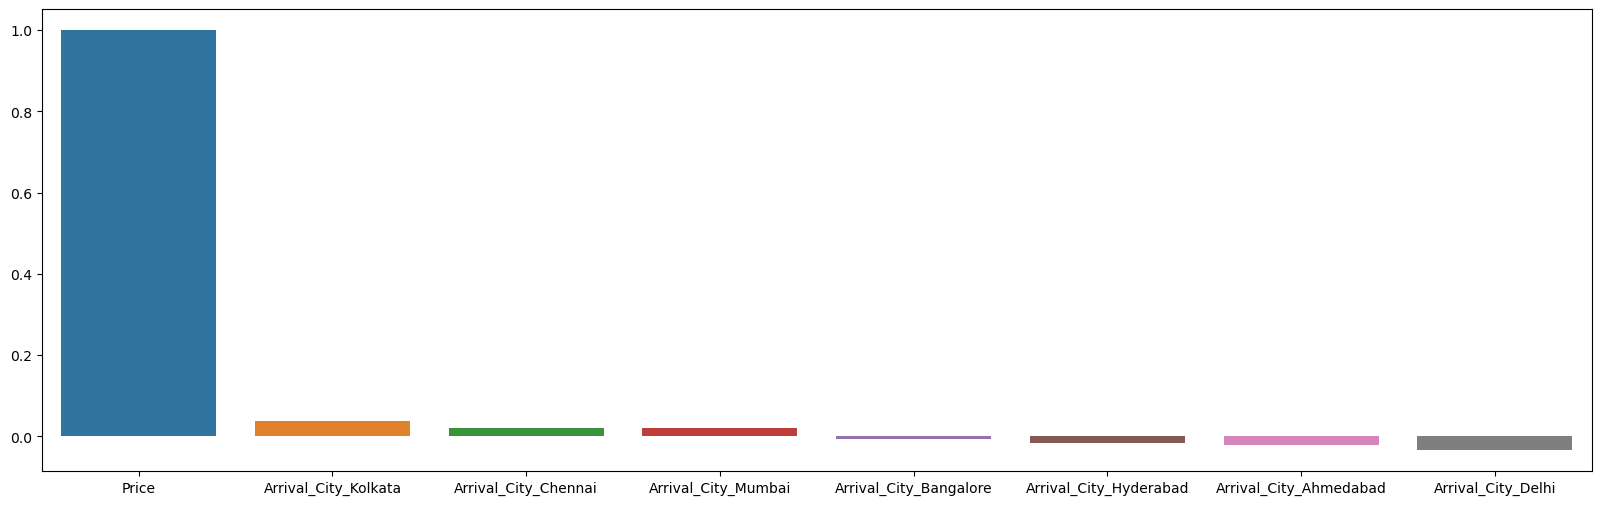

In [31]:
feature_corrlation = pd.get_dummies(df[['Arrival_City','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

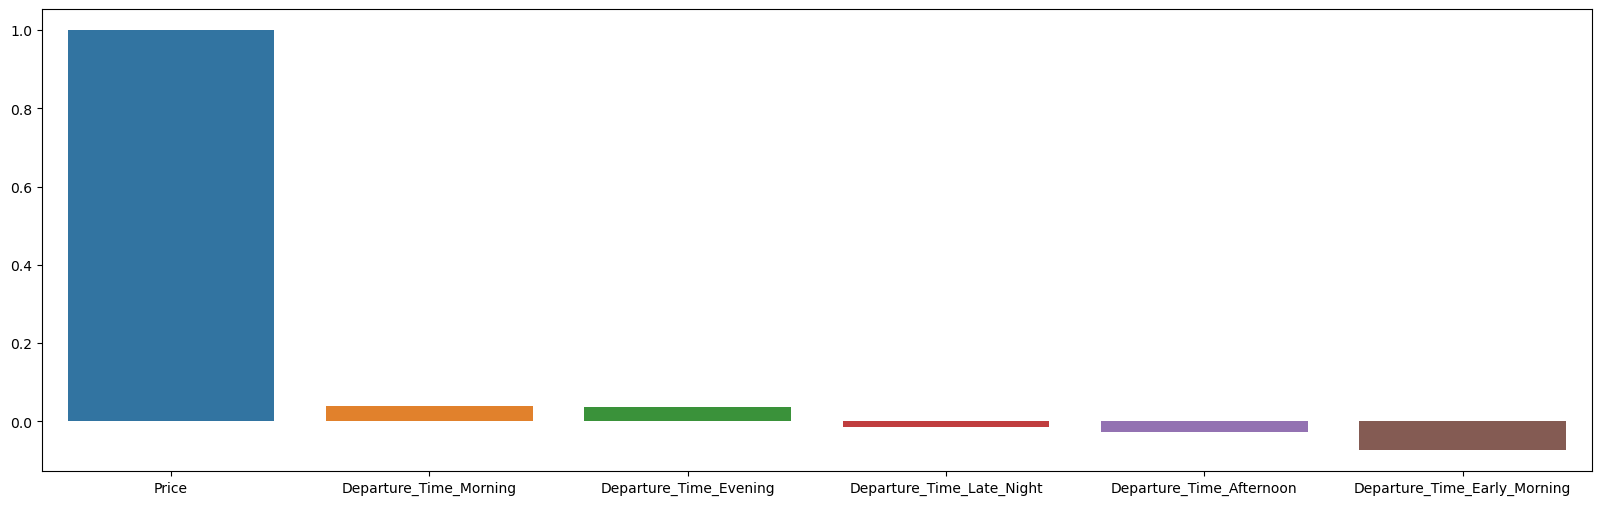

In [33]:
feature_corrlation = pd.get_dummies(df[['Departure_Time','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

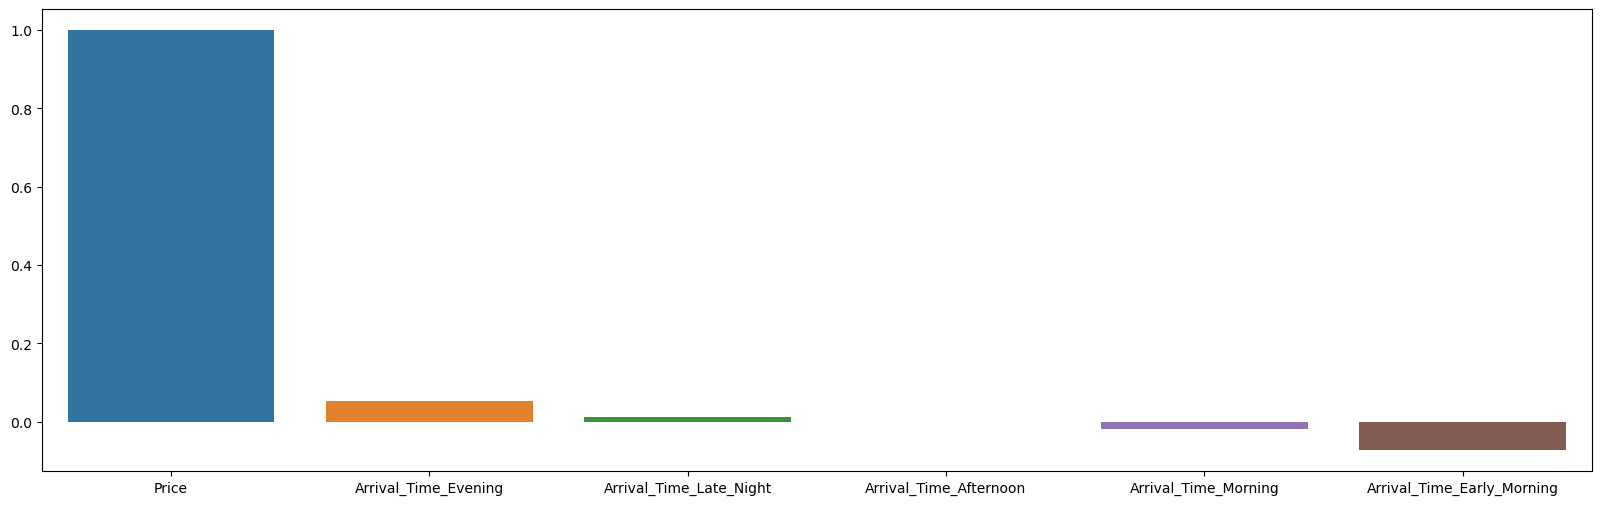

In [34]:
feature_corrlation = pd.get_dummies(df[['Arrival_Time','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

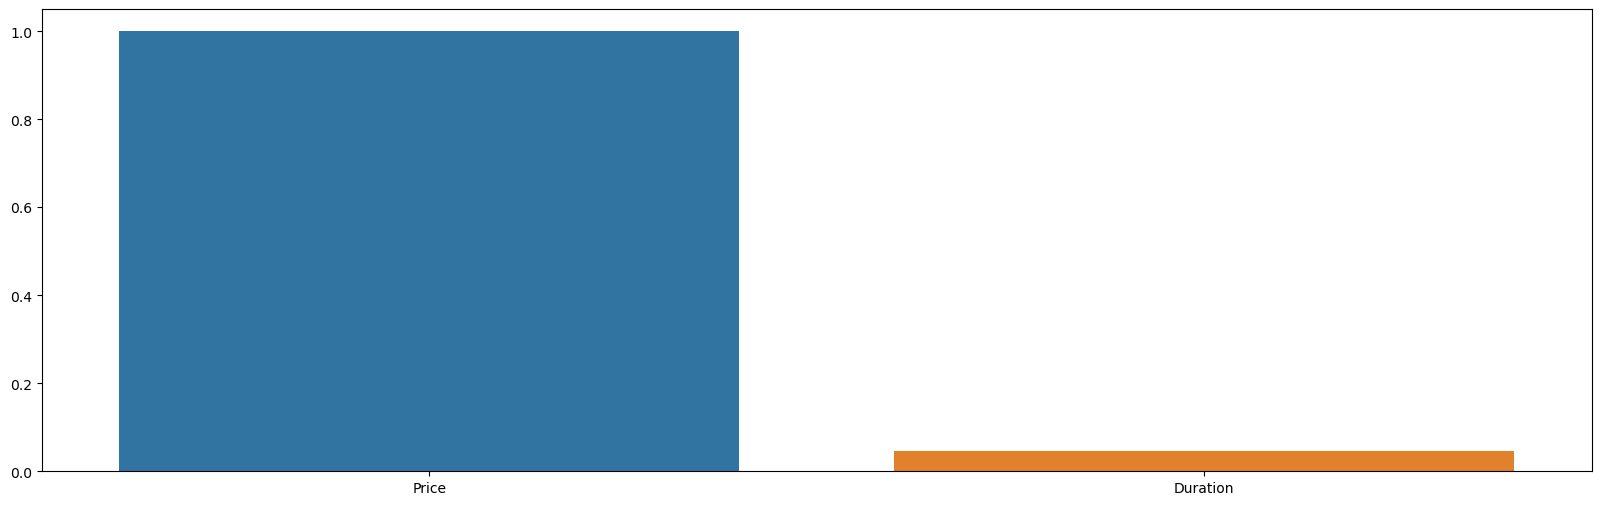

In [35]:
feature_corrlation = pd.get_dummies(df[['Duration','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

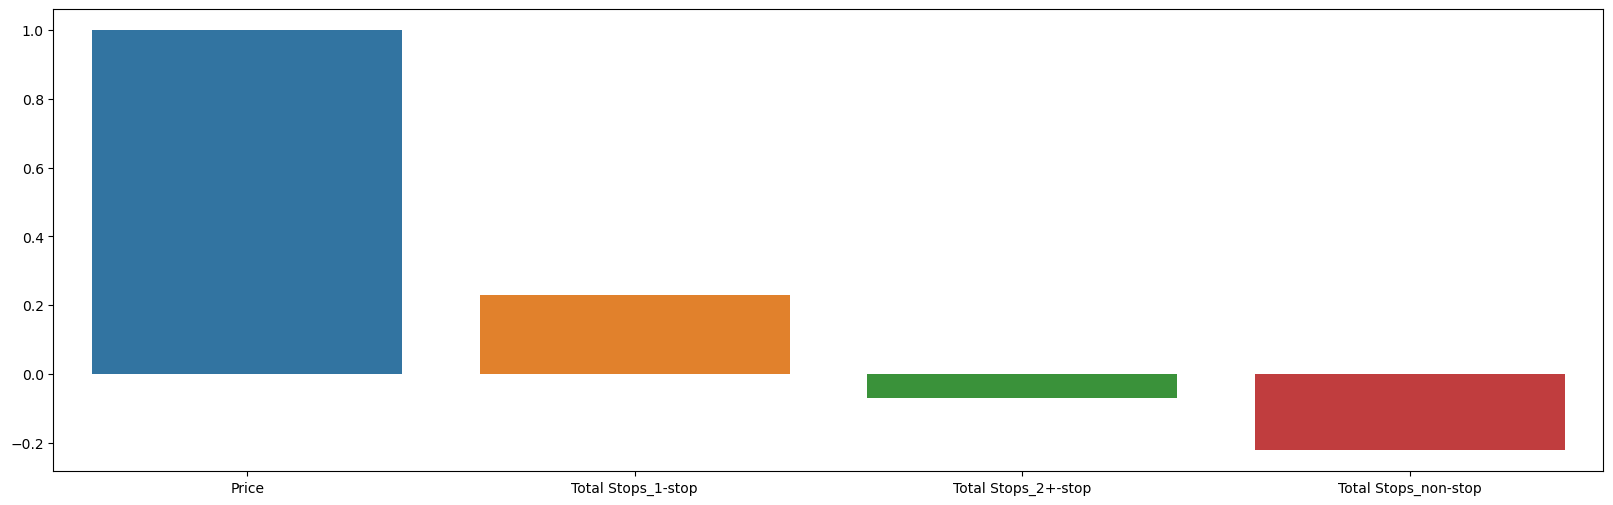

In [36]:
feature_corrlation = pd.get_dummies(df[['Total Stops','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

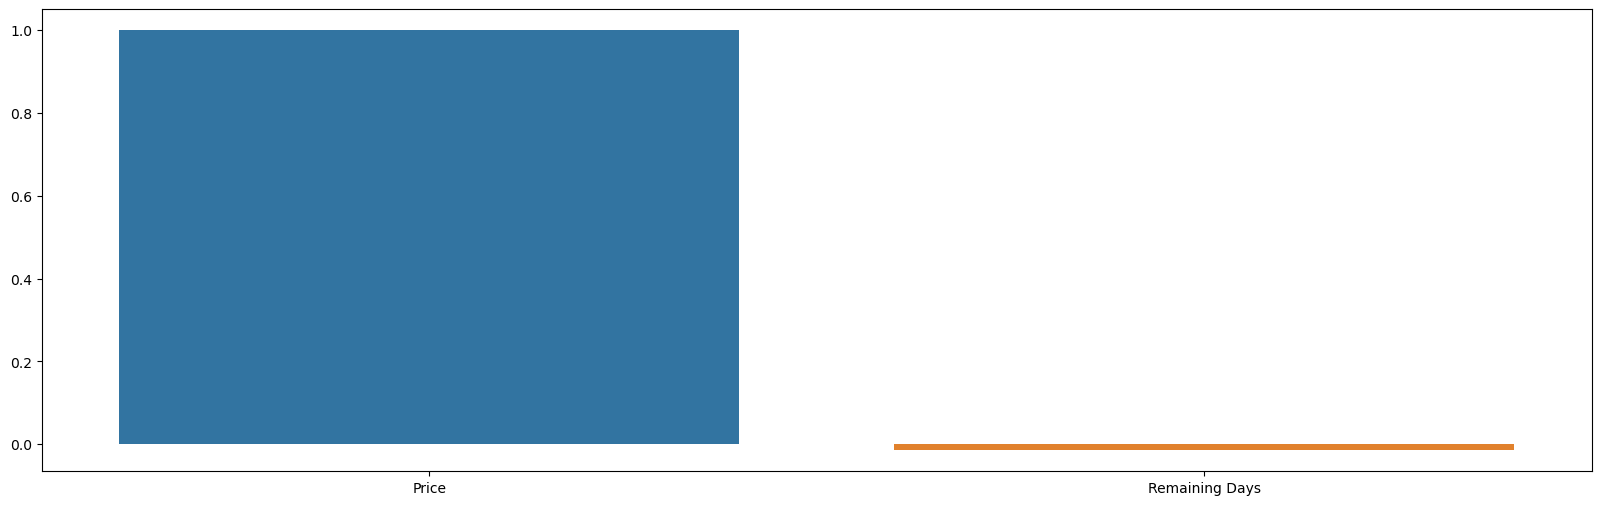

In [37]:
feature_corrlation = pd.get_dummies(df[['Remaining Days','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

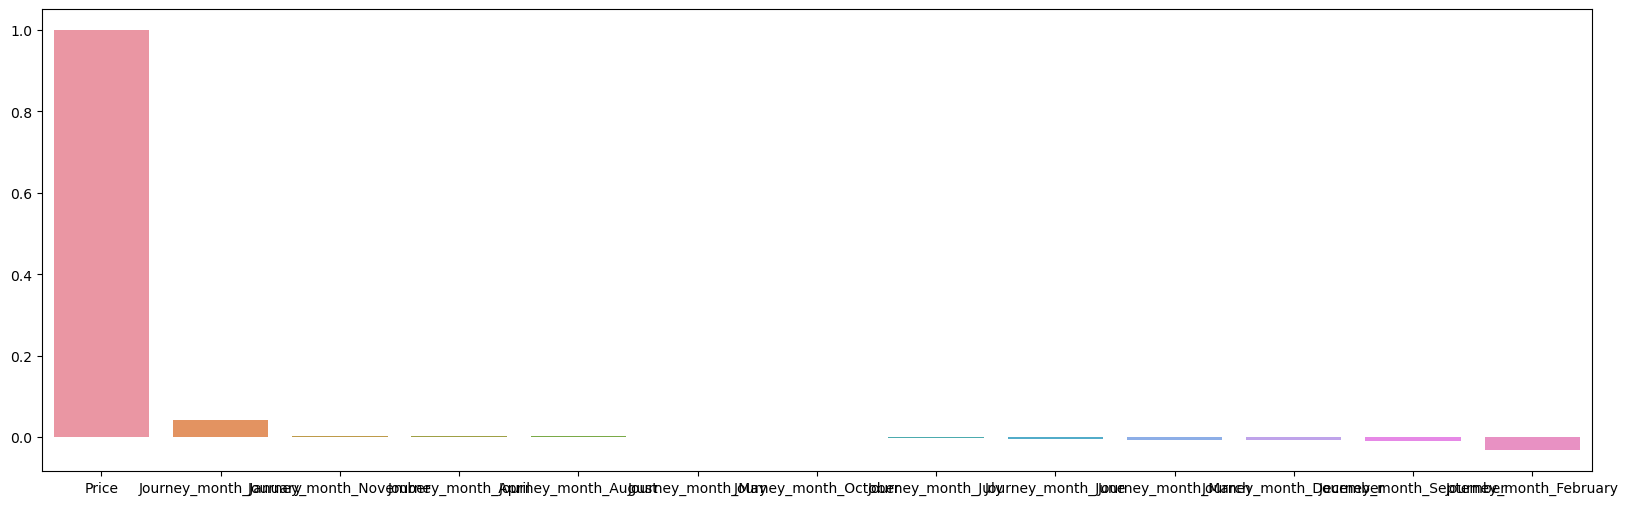

In [38]:
feature_corrlation = pd.get_dummies(df[['Journey_month','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

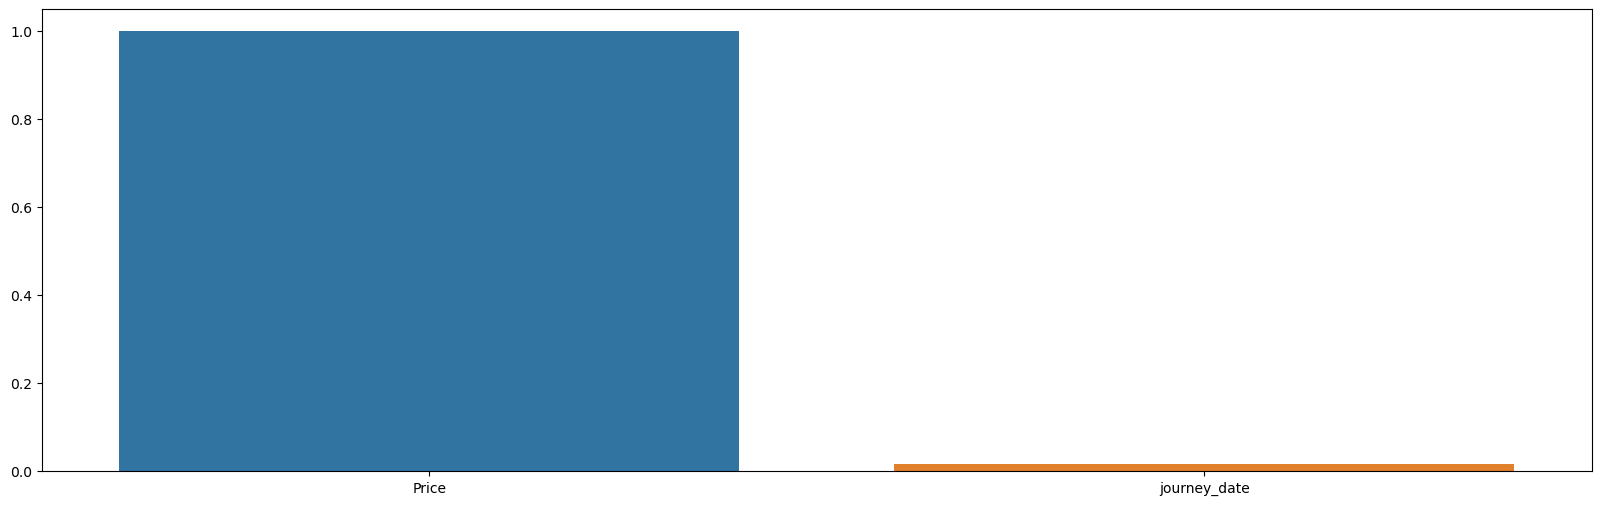

In [39]:
feature_corrlation = pd.get_dummies(df[['journey_date','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

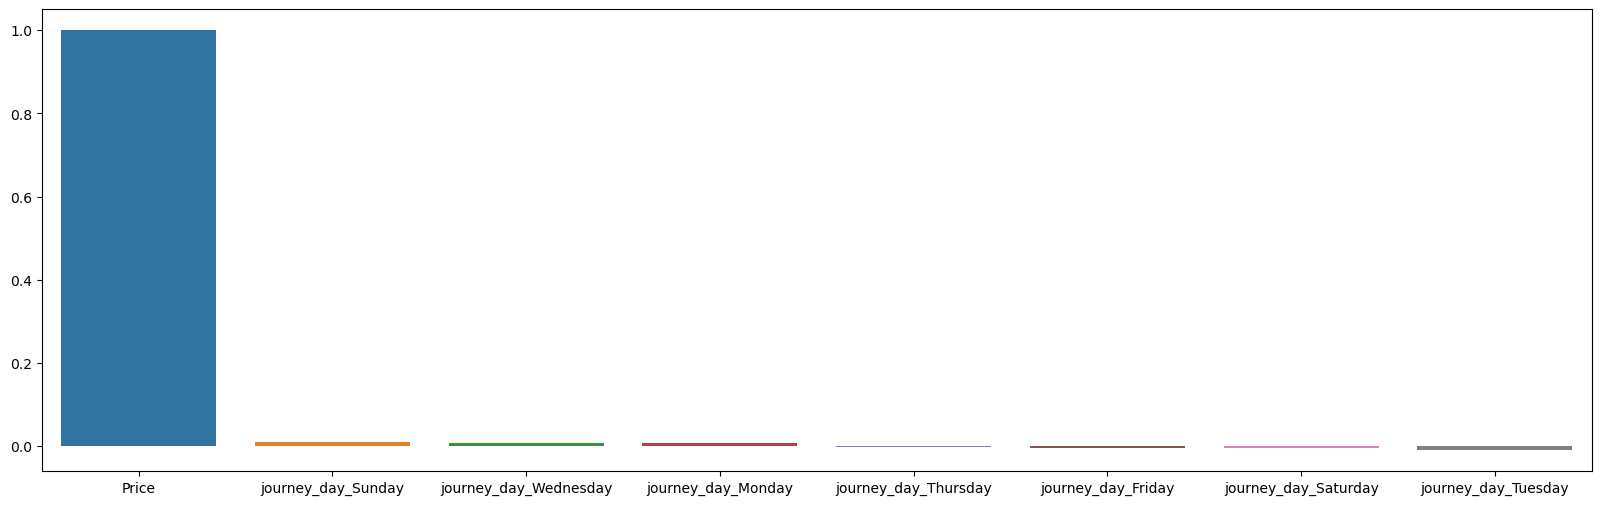

In [40]:
feature_corrlation = pd.get_dummies(df[['journey_day','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x=feature_corrlation.index,y=feature_corrlation.values)

<AxesSubplot:>

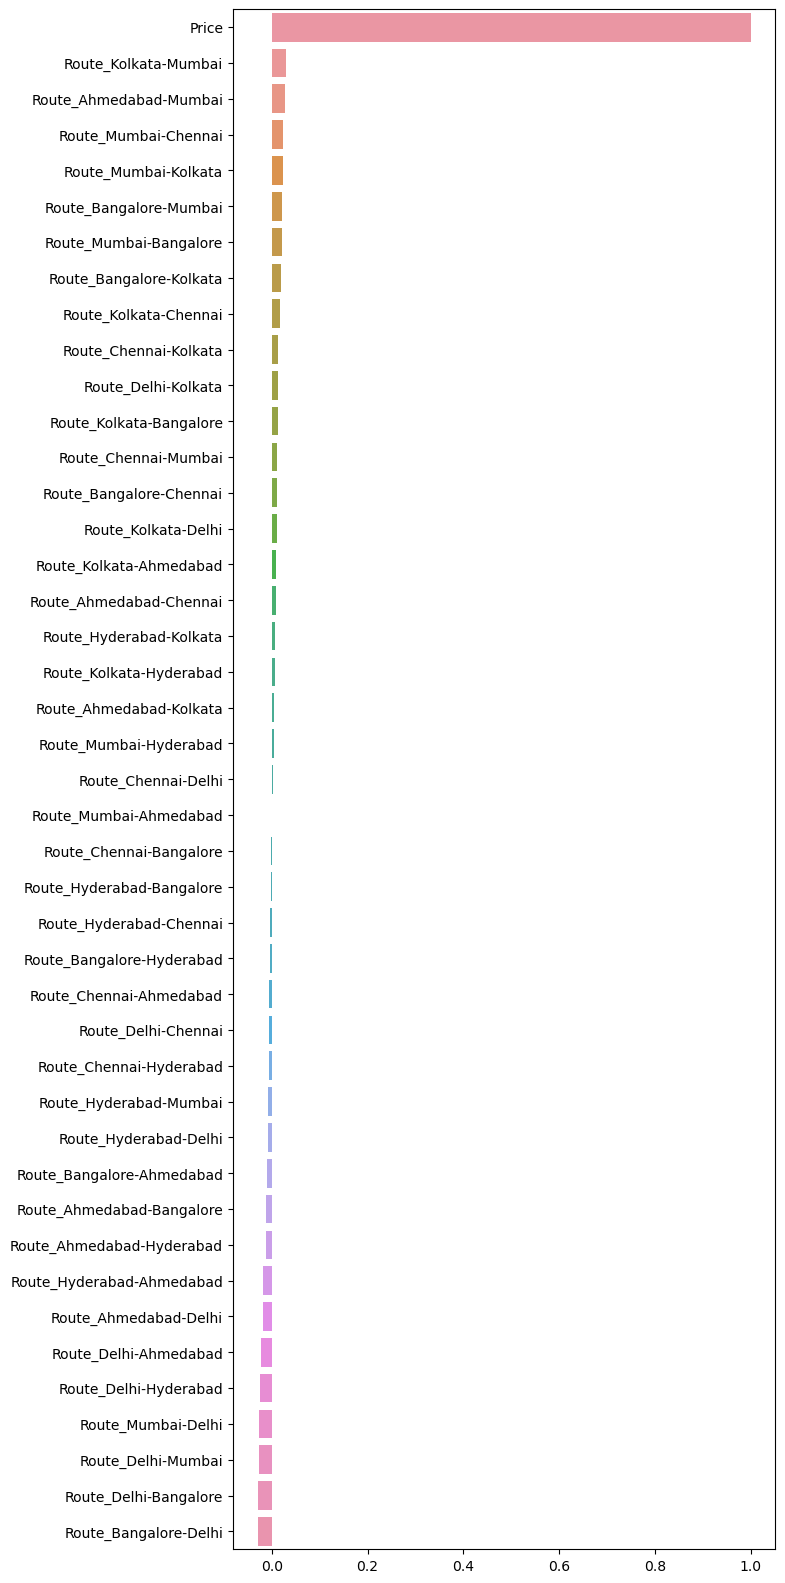

In [42]:
feature_corrlation = pd.get_dummies(df[['Route','Price']]).corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(7,20))
sns.barplot(x=feature_corrlation.values,y=feature_corrlation.index)

In [43]:
def GetCorrelation(feature):
    feature_corrlation = pd.get_dummies(df[[feature,'Price']]).corr()['Price'].sort_values(ascending=False)

    print(feature_corrlation)

In [47]:
for i in df.columns[:-1]:
    print(f'{i}\n')
    print(f'------------------------------')
    print(f'{GetCorrelation(i)}')

Airline

------------------------------
Price                  1.000000
Airline_Vistara        0.189192
Airline_Air India      0.169017
Airline_StarAir       -0.007585
Airline_AllianceAir   -0.028406
Airline_AkasaAir      -0.069779
Airline_SpiceJet      -0.084892
Airline_GO FIRST      -0.116615
Airline_AirAsia       -0.151483
Airline_Indigo        -0.303753
Name: Price, dtype: float64
None
Class

------------------------------
Price                   1.000000
Class_BUSINESS          0.902580
Class_FIRST             0.026287
Class_PREMIUMECONOMY   -0.126971
Class_ECONOMY          -0.710663
Name: Price, dtype: float64
None
Deparature_City

------------------------------
Price                        1.000000
Deparature_City_Kolkata      0.037473
Deparature_City_Mumbai       0.019494
Deparature_City_Chennai      0.007600
Deparature_City_Bangalore    0.003033
Deparature_City_Ahmedabad   -0.002837
Deparature_City_Hyderabad   -0.014098
Deparature_City_Delhi       -0.045716
Name: Price, dtype:

In [51]:
# Combination of Airline And Class To get The Price Difference
df.groupby(['Airline','Class']).mean()['Price'].sort_values(ascending=False)

Airline      Class         
Air India    FIRST             51133.384615
Vistara      BUSINESS          50924.875290
Air India    BUSINESS          46560.682860
Vistara      PREMIUMECONOMY    16298.844589
             ECONOMY           12117.745906
Air India    ECONOMY           11302.748743
StarAir      ECONOMY            9792.774194
Indigo       ECONOMY            8198.754809
SpiceJet     ECONOMY            8109.773154
GO FIRST     ECONOMY            8015.075005
AirAsia      ECONOMY            7092.265922
AllianceAir  ECONOMY            4077.501272
AkasaAir     ECONOMY            3570.034529
Name: Price, dtype: float64

In [54]:
# Deparature and Arrival City Flights Prices in Descending Order
df.groupby(['Deparature_City','Arrival_City']).mean()['Price'].sort_values(ascending=False)

Deparature_City  Arrival_City
Ahmedabad        Mumbai          25229.583398
Kolkata          Mumbai          24626.370147
Mumbai           Kolkata         24101.095637
                 Chennai         24090.072822
Kolkata          Chennai         23976.187490
Bangalore        Kolkata         23750.529956
Mumbai           Bangalore       23593.074694
Bangalore        Mumbai          23578.754535
Chennai          Kolkata         23341.472858
Kolkata          Ahmedabad       23239.372881
Delhi            Kolkata         23145.646415
Bangalore        Chennai         22998.116916
Kolkata          Bangalore       22940.833952
Ahmedabad        Chennai         22853.968728
Chennai          Mumbai          22768.750506
Kolkata          Delhi           22747.891363
Hyderabad        Kolkata         22474.759559
Ahmedabad        Kolkata         22377.487717
Kolkata          Hyderabad       22358.120005
Mumbai           Hyderabad       21970.756402
Chennai          Delhi           21775.932661
Mumb

In [57]:
df.groupby(['Airline','Total Stops']).mean()['Price'].sort_values(ascending=False)

Airline      Total Stops
Air India    1-stop         28637.476582
Vistara      1-stop         26569.101763
             2+-stop        18494.885837
StarAir      1-stop         16853.777778
Air India    non-stop       15661.791265
             2+-stop        15061.000946
Vistara      non-stop       14665.155749
Indigo       2+-stop        12065.895105
AirAsia      2+-stop         9601.759278
Indigo       1-stop          9004.604222
GO FIRST     1-stop          8835.551694
SpiceJet     1-stop          8809.901809
GO FIRST     2+-stop         8699.645669
AirAsia      1-stop          7032.125735
SpiceJet     non-stop        6253.952677
Indigo       non-stop        5789.036827
GO FIRST     non-stop        5402.826661
AirAsia      non-stop        4927.308655
AllianceAir  1-stop          4734.928571
StarAir      non-stop        4345.714286
AllianceAir  non-stop        3859.101695
AkasaAir     non-stop        3570.034529
Name: Price, dtype: float64

In [72]:
# The Airlines Maximum Prices on The Routes 
pd.set_option('display.max_rows', None)
df.groupby(['Airline','Route']).max()['Price'].sort_values(ascending=False)


Airline      Route              
Vistara      Ahmedabad-Delhi        75823.0
             Ahmedabad-Hyderabad    75780.0
Air India    Ahmedabad-Mumbai       75775.0
Vistara      Delhi-Hyderabad        75710.0
             Hyderabad-Bangalore    75686.0
             Mumbai-Ahmedabad       75648.0
             Kolkata-Mumbai         75635.0
             Mumbai-Kolkata         75631.0
             Mumbai-Delhi           75620.0
Air India    Ahmedabad-Bangalore    75556.0
Vistara      Delhi-Ahmedabad        75545.0
             Ahmedabad-Mumbai       75545.0
             Hyderabad-Mumbai       75541.0
             Kolkata-Hyderabad      75467.0
             Hyderabad-Kolkata      75462.0
             Bangalore-Mumbai       75375.0
Air India    Ahmedabad-Kolkata      75323.0
Vistara      Chennai-Mumbai         75227.0
             Chennai-Ahmedabad      75216.0
Air India    Ahmedabad-Chennai      75211.0
Vistara      Kolkata-Ahmedabad      75170.0
             Hyderabad-Chennai      75126.0

In [77]:
df.groupby(['Total Stops','Departure_Time']).mean()

Duration  Remaining Days  journey_date  \
Total Stops Departure_Time                                           
1-stop      Afternoon       5.942947       59.567022     14.862282   
            Early_Morning   5.672200       59.269815     14.941669   
            Evening         4.183724       60.416055     14.797057   
            Late_Night      3.943424       58.409244     14.987421   
            Morning         4.705165       60.646063     14.723152   
2+-stop     Afternoon       5.020658       58.557445     15.117318   
            Early_Morning   5.380463       51.253937     15.284449   
            Evening         4.346540       53.631625     15.576266   
            Late_Night      4.127855       52.663403     16.110490   
            Morning         4.716853       56.435145     14.949858   
non-stop    Afternoon       2.004181       59.045024     14.904406   
            Early_Morning   1.960996       58.279239     14.968103   
            Evening         1.917831       58.739502     14.875194   
            Late_Night      1.860818       58.732841     14.907011   
            Morning         1.913222       59.434629     14.765121   

                            Isdirect_flight         Price  
Total Stops Departure_Time                                 
1-stop      Afternoon                   0.0  22422.141046  
            Early_Morning               0.0  17411.545801  
            Evening                     0.0  25178.178059  
            Late_Night                  0.0  23356.209741  
            Morning                     0.0  24253.345556  
2+-stop     Afternoon                   0.0  16371.164076  
            Early_Morning               0.0  15015.201772  
            Evening                     0.0  15274.372203  
            Late_Night                  0.0  16598.983217  
            Morning                     0.0  17634.255872  
non-stop    Afternoon                   1.0  11387.171374  
            Early_Morning               1.0   7378.237549  
            Evening                     1.0  10617.117127  
            Late_Night                  1.0   8664.482952  
            Morning                     1.0  10658.182583

In [82]:
df.groupby(['Deparature_City','Arrival_City','Departure_Time','Arrival_Time']).max()['Price'].sort_values(ascending=False)

Deparature_City  Arrival_City  Departure_Time  Arrival_Time 
Ahmedabad        Delhi         Morning         Afternoon        75823.0
                 Hyderabad     Afternoon       Afternoon        75780.0
                               Morning         Evening          75780.0
                                               Afternoon        75780.0
                               Evening         Morning          75780.0
                                               Afternoon        75780.0
                               Morning         Morning          75780.0
                               Afternoon       Late_Night       75780.0
                 Mumbai        Morning         Afternoon        75775.0
Delhi            Hyderabad     Afternoon       Morning          75710.0
                               Evening         Afternoon        75710.0
                               Afternoon       Afternoon        75710.0
                               Evening         Morning          75710.0
   

In [83]:
df.groupby(['Deparature_City','Arrival_City','Departure_Time','Arrival_Time']).mean()['Price'].sort_values(ascending=False)

Deparature_City  Arrival_City  Departure_Time  Arrival_Time 
Mumbai           Bangalore     Morning         Early_Morning    46627.952830
Bangalore        Mumbai        Late_Night      Evening          45408.504202
                 Chennai       Early_Morning   Late_Night       45101.309091
                                               Evening          44061.964286
Mumbai           Bangalore     Late_Night      Evening          42933.986842
Bangalore        Kolkata       Early_Morning   Late_Night       38017.659794
                 Chennai       Early_Morning   Afternoon        37810.615385
Mumbai           Bangalore     Evening         Afternoon        37773.834302
Chennai          Bangalore     Afternoon       Early_Morning    37749.203488
                 Delhi         Early_Morning   Afternoon        37736.971831
Ahmedabad        Bangalore     Late_Night      Evening          37728.940678
Kolkata          Mumbai        Evening         Afternoon        37218.838973
Bangalore      

In [88]:
df.groupby(['Deparature_City','Arrival_City','Departure_Time','Arrival_Time']).min()['Price'].sort_values(ascending=False)

Deparature_City  Arrival_City  Departure_Time  Arrival_Time 
Ahmedabad        Kolkata       Evening         Afternoon        23122.0
Mumbai           Ahmedabad     Early_Morning   Late_Night       20368.0
                                               Afternoon        19567.0
Chennai          Bangalore     Late_Night      Afternoon        16516.0
Ahmedabad        Mumbai        Evening         Early_Morning    15829.0
Bangalore        Mumbai        Early_Morning   Early_Morning    15423.0
Mumbai           Bangalore     Early_Morning   Evening          15258.0
Ahmedabad        Mumbai        Late_Night      Early_Morning    15135.0
                                               Morning          15006.0
                                               Evening          15006.0
                                               Afternoon        15006.0
Chennai          Delhi         Early_Morning   Late_Night       14634.0
                                               Evening          14634.0
   

In [81]:
df.columns

Index(['Airline', 'Class', 'Deparature_City', 'Arrival_City', 'Departure_Time',
       'Arrival_Time', 'Duration', 'Total Stops', 'Remaining Days',
       'Journey_month', 'journey_date', 'journey_day', 'Route',
       'Isdirect_flight', 'Price'],
      dtype='object')

In [85]:
df.groupby(['journey_date','Journey_month','journey_day']).max()['Price'].sort_values(ascending=False)

journey_date  Journey_month  journey_day
25            January        Wednesday      75823.0
2             April          Sunday         75780.0
19            February       Sunday         75780.0
29            January        Sunday         75780.0
22            January        Sunday         75780.0
21            January        Saturday       75780.0
              February       Tuesday        75780.0
20            January        Friday         75780.0
              February       Monday         75780.0
18            February       Saturday       75780.0
2             March          Thursday       75780.0
              January        Monday         75780.0
17            January        Tuesday        75710.0
16            January        Monday         75710.0
2             November       Thursday       75648.0
3             June           Saturday       75635.0
              May            Wednesday      75635.0
              April          Monday         75620.0
28            January  

In [86]:
df.groupby(['journey_date','Journey_month','journey_day']).mean()['Price'].sort_values(ascending=False)

journey_date  Journey_month  journey_day
16            January        Monday         24664.470418
20            January        Friday         24003.370720
21            January        Saturday       23928.732907
29            January        Sunday         23764.768366
22            January        Sunday         23678.902079
25            January        Wednesday      23645.189891
17            January        Tuesday        23546.668410
18            January        Wednesday      22794.171858
26            January        Thursday       22668.965566
23            January        Monday         22473.090378
30            January        Monday         22232.347955
27            January        Friday         22038.656697
2             April          Sunday         21998.552440
28            January        Saturday       21984.195901
2             November       Thursday       21837.009268
19            January        Thursday       21793.931188
2             August         Wednesday      216

In [87]:
df.groupby(['journey_date','Journey_month','journey_day']).min()['Price'].sort_values(ascending=False)

journey_date  Journey_month  journey_day
26            January        Thursday       1934.0
17            January        Tuesday        1934.0
23            January        Monday         1918.0
25            January        Wednesday      1918.0
16            January        Monday         1918.0
27            January        Friday         1914.0
29            January        Sunday         1914.0
2             March          Thursday       1914.0
              February       Thursday       1914.0
16            February       Thursday       1914.0
23            February       Thursday       1914.0
2             September      Saturday       1914.0
3             February       Friday         1914.0
30            January        Monday         1914.0
31            January        Tuesday        1914.0
20            January        Friday         1896.0
18            January        Wednesday      1896.0
19            January        Thursday       1816.0
21            January        Saturday    